# Tests

In [3]:
function test_eq(a, b)
    @assert a==b
end

test_eq (generic function with 1 method)

In [6]:
test_eq(10,10)

In [7]:
test_eq(10,30)

AssertionError: AssertionError: a == b

# Matmul

In [84]:
using Flux, Flux.Data.MNIST, Images
using Statistics

In [9]:
labels = MNIST.labels();
images = MNIST.images();

In [10]:
length(labels)

60000

,,,,

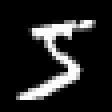
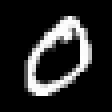
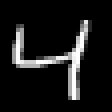
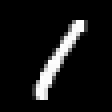
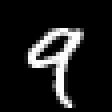

In [11]:
images[1:5]

In [333]:
size(hcat(float.(vec.(images[1:50000]))...))

(784, 50000)

In [16]:
weights = randn(784, 10);

In [18]:
bias = zeros(10);

In [24]:
size(weights)

(784, 10)

In [54]:
c = [1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [29]:
size(c)

(3,)

In [36]:
reshape(collect(c),1,3)

1×3 Array{Int64,2}:
 1  2  3

## Matmul

In [53]:
function matmul(a,b)
    return a*b
end

matmul (generic function with 1 method)

In [56]:
c = [1 2 3; 4 1 6; 7 8 1]

3×3 Array{Int64,2}:
 1  2  3
 4  1  6
 7  8  1

In [58]:
@time matmul(c,c)

  0.002767 seconds (1.32 k allocations: 71.567 KiB)


3×3 Array{Int64,2}:
 30  28  18
 50  57  24
 46  30  70

## Normalize

In [151]:
size(images[1])

(28, 28)

In [152]:
28*28

784

In [591]:
function Normalize(x, m,s)
    @show return (x.-m)/s
end

Normalize (generic function with 1 method)

In [592]:
function preprocess(img)
    return hcat(float.(vec.(img))...)'
end

preprocess (generic function with 1 method)

In [593]:
# x_train=preprocess(normalize(images[1:50000]));
# y_train=labels[1:50000];
# x_valid=preprocess(normalize(images[50001:60000]));
# y_valid=labels[50001:60000];

In [594]:
x_train=preprocess(images[1:50000]);
y_train=labels[1:50000];
x_valid=preprocess(images[50001:60000]);
y_valid=labels[50001:60000];

In [595]:
train_mean,train_std = Float64.(mean(x_train)), Float64.(std(x_train))

(0.13139165937900543, 0.29464760422706604)

In [598]:
x_train = Normalize(x_train,train_mean,train_std);
x_valid = Normalize(x_valid,train_mean,train_std);

In [599]:
@show size(x_train)
@show size(y_train)
@show size(x_valid)
@show size(y_valid)

size(x_train) = (50000, 784)
size(y_train) = (50000,)
size(x_valid) = (10000, 784)
size(y_valid) = (10000,)


(10000,)

In [600]:
n,m = size(x_train)[1],size(x_train)[2]
c = maximum(y_train)+1
n,m,c

(50000, 784, 10)

# Basic arch

In [601]:
nh = 50

50

In [606]:

w1= randn(m, nh)/sqrt(m);
b1 = zeros(nh);
w2 = randn(nh,1)/sqrt(n);
b2 = zeros(1);

In [607]:
@info size(w1); @info size(b1); @info size(w2); @info size(b2)

┌ Info: (784, 50)
└ @ Main In[607]:1
┌ Info: (50,)
└ @ Main In[607]:1
┌ Info: (50, 1)
└ @ Main In[607]:1
┌ Info: (1,)
└ @ Main In[607]:1


In [608]:
mean(Float64.(x_valid)),std(Float64.(x_valid))

(-0.007586176333812019, 1.039073830587576)

## Linear

In [609]:
function lin(x,w,b)
    @show size(x)
    @show size(w)
    @show size(b)
    @show size(x*w)
    @show size((x*w).+b')
    return (x*w).+b'
end

lin (generic function with 1 method)

In [610]:
lin(x_valid,w1,b1);

size(x) = (10000, 784)
size(w) = (784, 50)
size(b) = (50,)
size(x * w) = (10000, 50)
size(x * w .+ b') = (10000, 50)


## Relu

In [622]:
function relu(A)
    A[A.<0.0] .= 0.0;
    @show size(A)
    return A.-0.5
end

relu (generic function with 1 method)

In [623]:
@time relu([1.0,-1.0,-100000])

size(A) = (3,)
  0.000087 seconds (66 allocations: 1.781 KiB)


3-element Array{Float64,1}:
  0.5
 -0.5
 -0.5

In [624]:
size(x_valid)

(10000, 784)

In [625]:
t = relu(lin(x_valid,w1,b1));

size(x) = (10000, 784)
size(w) = (784, 50)
size(b) = (50,)
size(x * w) = (10000, 50)
size(x * w .+ b') = (10000, 50)
size(A) = (10000, 50)


In [626]:
mean(t), std(t)

(0.07371328201038156, 0.855686337293503)

## Kaiming

In [616]:
nh = 50

50

In [617]:
m

784

In [618]:

w1= randn(m, nh)*sqrt(2.0/m);
b1 = zeros(nh);
w2 = randn(nh,1)/sqrt(n);
b2 = zeros(1);

In [619]:
@info size(w1); @info size(b1); @info size(w2); @info size(b2)

┌ Info: (784, 50)
└ @ Main In[619]:1
┌ Info: (50,)
└ @ Main In[619]:1
┌ Info: (50, 1)
└ @ Main In[619]:1
┌ Info: (1,)
└ @ Main In[619]:1


In [620]:
t = relu(lin(x_valid,w1,b1));

size(x) = (10000, 784)
size(w) = (784, 50)
size(b) = (50,)
size(x * w) = (10000, 50)
size(x * w .+ b') = (10000, 50)
size(A) = (10000, 50)


In [621]:
mean(t), std(t)

(0.5737132820103816, 0.8556863372935029)

In [628]:
function model(xb)
    l1 = lin(xb,w1,b1)
    l2 = relu(l1)
    l1 = lin(l2,w2,b2)
end

model (generic function with 1 method)

In [630]:
@time model(x_valid);

size(x) = (10000, 784)
size(w) = (784, 50)
size(b) = (50,)
size(x * w) = (10000, 50)
size(x * w .+ b') = (10000, 50)
size(A) = (10000, 50)
size(x) = (10000, 50)
size(w) = (50, 1)
size(b) = (1,)
size(x * w) = (10000, 1)
size(x * w .+ b') = (10000, 1)
  0.026562 seconds (785 allocations: 25.257 MiB)


## MSE

In [631]:
size(model(x_valid))

size(x) = (10000, 784)
size(w) = (784, 50)
size(b) = (50,)
size(x * w) = (10000, 50)
size(x * w .+ b') = (10000, 50)
size(A) = (10000, 50)
size(x) = (10000, 50)
size(w) = (50, 1)
size(b) = (1,)
size(x * w) = (10000, 1)
size(x * w .+ b') = (10000, 1)


(10000, 1)

In [644]:
size(reshape(randn(5000,1),(5000)))

(5000,)

In [646]:
function squeeze(x)
    return reshape(x, size(x)[1])
end

squeeze (generic function with 1 method)

In [649]:
size(squeeze(randn(500,1)))

(500,)

In [655]:
function mse(output,targ)
    return mean((squeeze(output).-targ).^2)
end

mse (generic function with 1 method)

In [653]:
preds = model(x_train);

size(x) = (50000, 784)
size(w) = (784, 50)
size(b) = (50,)
size(x * w) = (50000, 50)
size(x * w .+ b') = (50000, 50)
size(A) = (50000, 50)
size(x) = (50000, 50)
size(w) = (50, 1)
size(b) = (1,)
size(x * w) = (50000, 1)
size(x * w .+ b') = (50000, 1)


In [656]:
mse(preds, y_train)

28.17091047072405

## Gradients and backward pass

In [748]:
using AutoGrad

In [ ]:
function mse(output,targ)
    return mean((squeeze(output).-targ).^2)
end

In [807]:
function lin(x,w,b)
    return (x*w).+b'
end

lin (generic function with 1 method)

In [815]:
function model(xb)
    l1 = lin(xb,w1,b1)
    l2 = relu(l1)
    l1 = lin(l2,w2,b2)
    return l1
end

model (generic function with 1 method)

In [836]:
function weightFunc(h...; seed=nothing)
    seed==nothing || srand(seed)
    w = Any[]
    x = 28*28
    for y in [h..., 10]
        push!(w, convert(Array{Float32}, 0.1*randn(y,x)))
        push!(w, zeros(Float32, y))
        x = y
    end
    return w
end

weightFunc (generic function with 1 method)

In [839]:
w=weightFunc()
# size(w)

2-element Array{Any,1}:
 Float32[-0.2548229 -0.03374704 … -0.17501445 0.023344764; -0.19818652 -0.089839004 … 0.13681303 -0.06827336; … ; 0.09731475 0.08434625 … -0.047196828 0.06420951; -0.28086302 0.07625432 … 0.12718448 -0.077583656]
 Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [787]:

function forward_and_backward(inp,targ)
    l1 = lin(inp, w1, b1)
    l2 = relu(l1)
    out = lin(l2, w2, b2)
    loss = mse(out,targ)
    return loss
    
end

forward_and_backward (generic function with 2 methods)

In [ ]:
function model(xb)
    l1 = lin(xb,w1,b1)
    l2 = relu(l1)
    l1 = lin(l2,w2,b2)
end